# [Data Science Term Project proposal]

### 1. Team member
201835401 강나현

201835454 박민석

201935121 임혜균

202035400 현도연

### 2. Dataset
'googleplaystore.csv' file of "https://www.kaggle.com/datasets/lava18/google-play-store-apps"
; explanation ; details of the applications on Google Play(2019)
This information is scraped from the Google Play Store.
The Play Store apps data has enormous potential to drive app-making businesses to success.
Actionable insights can be drawn for developers to work on and capture the Android market.


* columns
 * (1)  : App: Application name
 * (2)  : category: Category the app belongs to -FAMILY, GAME, TOOLS, BUSINESS
 * (3)  : rating: Overall user rating of the app (as when scraped)
 * (4)  : Reviews: Number of user reviews for the app (as when scraped)
 * (5)  : Installs: Number of user downloads/installs for the app (as when scraped)
 * (6)  : Type : Paid / Free
 * (7)  : Price : Price of the app (as when scraped)
 * (8)  : Content rating : Age group the app is targeted at - Everyone /Teen / Mature 17+
 * (9)  : Last Updated ; Date when the app was last updated on Play Store (as when scraped)
 * (10) : Current Ver ; Current version of the app available on Play Store (as when scraped)
 * (11) : Android Ver ; Min required Android version (as when scraped)
 * (12) : Size: Size of the app (as when scraped)
 * (13) : Genre: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to -Tools/ Entertainment / Education/ Business


###3. Objectives of analysis
**Main objectives**: Find out which categories were popular in the year and recommend apps based on them.

**Sub objectives**: 
1. Find out what properties popular applications have.
2. Find out the correlation between Rating, Review count, and Install count.(Because it is difficult to evaluate apps only with Rating.)
3. Afterwards, popular apps such as "Category", "Age", and "Paid/Free" are recommended based on the measured "Popularity" criteria.


### 4. Dataset discription
1. Statics
  *   df.shape
  *   df.index
  *   df.dtypes
  *   df.describe()
  *   df.columns
  *   df.info()
2. Tables
  *   df.info()
3. Plots: plot 'category', 'Installs', 'Rating', 'Price' and 'Size'.
  *   plt.scatter()
  *   plt.plot(x_value, y)
4. Missing values
  *  If 'numerical', replace with the average value of each column.
  *  'Null' value of Rating is replaced with a value similar to the number of installations.
5. Outliers
  *  If you have 100 or less reviews, report it as Outlier and drop it.


---

## **What we need to deal with in the future**
1. Column with wrong value entered exists as a whole.
2. The data of 'Reviews', 'Size', 'Price' and 'Installs' must be float, not object.
3. Nan value exist in 'Rating'. A value of more than 5 points exists.
4. We decide some datasets that are not needed for our purpose are 'Last Updated', 'Current Ver', 'Android Ver', 'Size' and 'Genre'. -> Will be dropped in preprocessing steps.

In [189]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
#from google.colab import drive
#drive.mount("/content/sample_data/")

In [191]:
#df = pd.read_csv("/content/sample_data/googleplaystore.csv", encoding="cp949")
#df = pd.read_csv("/content/sample_data/googleplaystore.csv")
#df = pd.read_csv('googleplaystore.csv')

In [192]:
url = "https://drive.google.com/file/d/19pl0nAmNpIInWbkR8kHx2FxC2zFeW7YA/view?usp=sharing"
path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
print("▶ 공유파일 링크변환 경로명 : ", path)
df = pd.read_csv(path)
df.head()

▶ 공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=19pl0nAmNpIInWbkR8kHx2FxC2zFeW7YA


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Dataset description: Statistics

In [193]:
df.shape

(10841, 13)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [195]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [196]:
for  category in df['Category'].unique():
    print(category)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION
1.9


In [197]:
for  install in df['Installs'].unique():
    print(install)

10,000+
500,000+
5,000,000+
50,000,000+
100,000+
50,000+
1,000,000+
10,000,000+
5,000+
100,000,000+
1,000,000,000+
1,000+
500,000,000+
50+
100+
500+
10+
1+
5+
0+
0
Free


In [198]:
for  genre in df['Genres'].unique():
    print(genre)

Art & Design
Art & Design;Pretend Play
Art & Design;Creativity
Art & Design;Action & Adventure
Auto & Vehicles
Beauty
Books & Reference
Business
Comics
Comics;Creativity
Communication
Dating
Education;Education
Education
Education;Creativity
Education;Music & Video
Education;Action & Adventure
Education;Pretend Play
Education;Brain Games
Entertainment
Entertainment;Music & Video
Entertainment;Brain Games
Entertainment;Creativity
Events
Finance
Food & Drink
Health & Fitness
House & Home
Libraries & Demo
Lifestyle
Lifestyle;Pretend Play
Adventure;Action & Adventure
Arcade
Casual
Card
Casual;Pretend Play
Action
Strategy
Puzzle
Sports
Music
Word
Racing
Casual;Creativity
Casual;Action & Adventure
Simulation
Adventure
Board
Trivia
Role Playing
Simulation;Education
Action;Action & Adventure
Casual;Brain Games
Simulation;Action & Adventure
Educational;Creativity
Puzzle;Brain Games
Educational;Education
Card;Brain Games
Educational;Brain Games
Educational;Pretend Play
Entertainment;Education
Ca

# Dataset description: Tables

In [199]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Dataset description: Plots

Usually, histograms are used a lot when checking distributions. You draw a bar graph by dividing the sections. However, you should be careful because the histogram results vary greatly depending on how you set the interval, which can lead to wrong conclusions and interpretations.

---

Therefore, **Kernel Density Estimator** (KDE) is a common alternative.
 * **sns.kdeplot(data, shade)**
 * data: Datasets you want to visualize.
 * shade: Determining whether to shade the space under the curve; **True, False**
 * clip: range of x
---



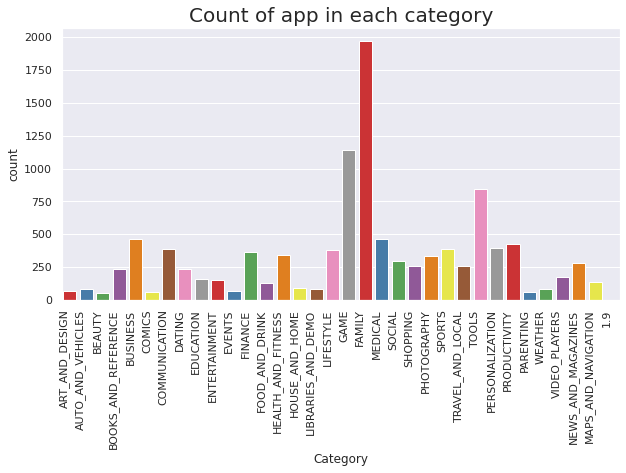

In [200]:
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of app in each category',size = 20)
plt.show()

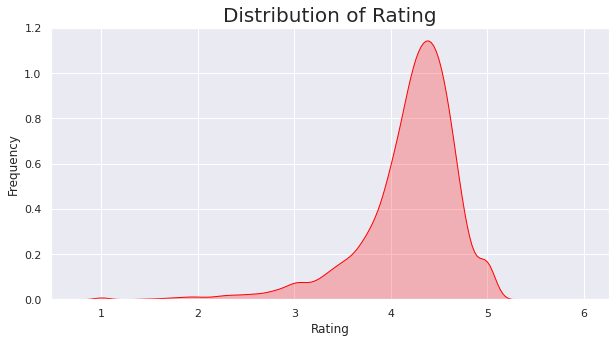

In [201]:
g = sns.kdeplot(df.Rating, color="Red", shade = True, clip=(0.0, 6.0))
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

In [202]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

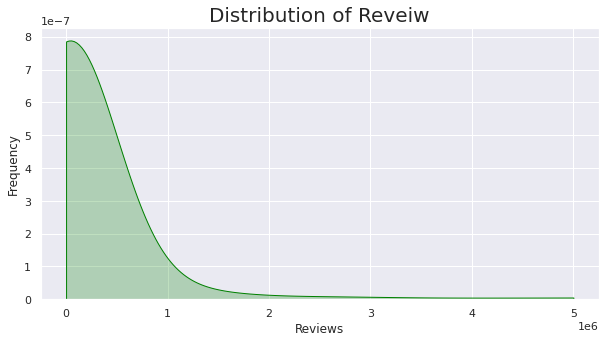

In [203]:
g = sns.kdeplot(df.Reviews, color="Green", shade = True, clip=(0.0, 5000000))
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)
plt.show()

In [204]:
install_numeric = df.Installs.copy()
install_numeric = install_numeric.apply(lambda x: x.replace(',',''))
install_numeric = install_numeric.apply(lambda x: x.replace('+',''))
install_numeric = install_numeric.apply(lambda x: x.replace('Free','0'))
install_numeric = install_numeric.apply(lambda x: x.replace('','0'))
install_numeric = install_numeric.apply(lambda x: int(x))

In [205]:
Sorted_value = sorted(list(install_numeric.unique()))
install_numeric.replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

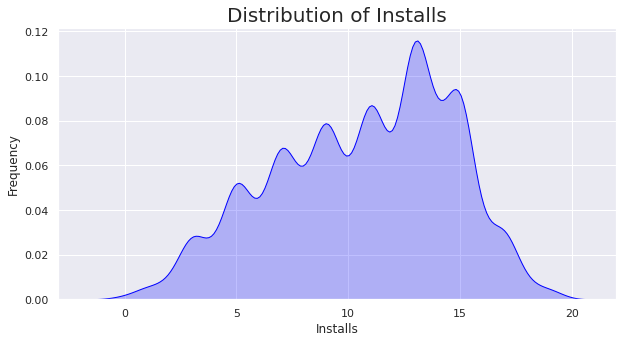

In [206]:
g = sns.kdeplot(install_numeric, color="Blue", shade = True)
g.set_xlabel("Installs")
g.set_ylabel("Frequency")
plt.title('Distribution of Installs',size = 20)
plt.show()

##Missing Values


### Null values

In [207]:
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Reviews              1
Type                 1
Content Rating       1
App                  0
Category             0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [208]:
df=df.dropna(axis=0)

In [209]:
df.isnull().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Install has non numeric values ( "Free", "+" )



In [210]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [211]:
df['Reviews'].describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

# Wrong Values

### Rating has wrong value (>5)

In [212]:
df['Rating'] = df['Rating'].apply(pd.to_numeric,errors='coerce')

In [213]:
df[ df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [214]:
c = df[ df['Rating'] > 5].index
df.drop(c,inplace=True)

# Unusable

Remove unnecessary columns

In [215]:
df.drop(['Last Updated', 'Current Ver', 'Android Ver', 'Size','Genres'],axis=1)


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,500+,Free,0,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,"5,000+",Free,0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100+,Free,0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,"1,000+",Free,0,Mature 17+


# Outliers

Drops the index of a value less than or greater than the minimum value.

Using IQR of the Review.

In [216]:
df['Reviews'] = df['Reviews'].apply(pd.to_numeric,errors='coerce')

In [217]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [218]:
q1=df['Reviews'].quantile(q=0.25, interpolation='nearest')
q3=df['Reviews'].quantile(q=0.75, interpolation='nearest')
q1=int(q1)
q3=int(q3)
iqr=q3-q1
iqr

81427

In [219]:
condition1=df['Reviews']<q1-1.5*iqr
condition2=df['Reviews']>q3+1.5*iqr
a=df[condition1].index
b=df[condition2].index
df.drop(a,inplace=True)
df.drop(b,inplace=True)

In [220]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


# **Encoder**
Encoding for data missing algorithms
Map data to an array for processing by data mining algorithms.

*   Convert non-numeric data to numeric data.
 *   Categorical data -> numeric data
 *   text -> numeric data
*   Convert data to be in [0, 1] for processing by neural networks.




In [221]:
##필요없는 행 지우기 (Missing value 파트에서 다루면 지우기.)
'''Drop these portions of information as deemed it unecessary for our machine learning algorithm'''
#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','Size', 'Genres'], axis = 1, inplace = True)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7726 entries, 0 to 10839
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7726 non-null   object 
 1   Category        7726 non-null   object 
 2   Rating          7726 non-null   float64
 3   Reviews         7726 non-null   float64
 4   Installs        7726 non-null   object 
 5   Type            7726 non-null   object 
 6   Price           7726 non-null   object 
 7   Content Rating  7726 non-null   object 
dtypes: float64(2), object(6)
memory usage: 543.2+ KB


---
1. Encode ***df['Size']***

[[[[ MEMO:df['Size'] 가 drop 될 경우, 아래 주석 지우기

In [223]:
# # Cleaning of sizes of the apps and also filling up the missing values using ffill
# #scaling and cleaning size of installation
# def change_size(size):
#     if 'M' in size:
#         x = size[:-1]
#         x = float(x)*1000000
#         return(x)
#     elif 'k' == size[-1:]:
#         x = size[:-1]
#         x = float(x)*1000
#         return(x)
#     else:
#         return None

# df["Size"] = df["Size"].map(change_size)

# #filling Size which had NA
# df.Size.fillna(method = 'ffill', inplace = True)

---
2. Encode ***df['Installs']***


In [224]:
# Cleaning the number of installations column
#df['Installs'] = [int(i[:-1].replace(',','+','')) for i in df['Installs']]
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: x.replace('Free','0'))
df.Installs = df.Installs.apply(lambda x: x.replace('','0'))
df.Installs = df.Installs.apply(lambda x: int(x))

In [225]:
df['Installs'].unique()

array([        1000000000,       500000000000,     50000000000000,
             100000000000,         5000000000,     10000000000000,
         1000000000000000,           50000000,   5000000000000000,
                 10000000,             100000,             500000,
                     1000,                 50,               5000,
                       10, 100000000000000000])

---
3. Encode ***df['Type']***


In [226]:
# Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

---
4. Encode ***df['Content Rating']***


In [227]:
#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

---
5. Encode ***df['Price']***
*   non-numeric value : $
*   change *object* into *float*




In [228]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [229]:
# Missing value 파트에서 다루면 지우기.
# df['Price']에 'Everyone' 값이 오류가 남 => 'Everyone'이 있는 행을 지워줌.
df.drop(df.loc[df['Price'] == 'Everyone'].index, inplace = True)
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [230]:
# Price cealning
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [231]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

---
5. Encode ***df['Reviews']***
*   Don't need to Encoding ***df['Reviews']*** ; float64




In [232]:
df['Reviews'].head()

0      159.0
1      967.0
2    87510.0
4      967.0
5      167.0
Name: Reviews, dtype: float64

---
6. Encode ***df['Category']***

In [233]:
df['Category'].value_counts().index

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'LIFESTYLE', 'FINANCE',
       'BUSINESS', 'PERSONALIZATION', 'SPORTS', 'PRODUCTIVITY',
       'HEALTH_AND_FITNESS', 'COMMUNICATION', 'PHOTOGRAPHY',
       'NEWS_AND_MAGAZINES', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
       'SOCIAL', 'BOOKS_AND_REFERENCE', 'EDUCATION', 'VIDEO_PLAYERS',
       'MAPS_AND_NAVIGATION', 'ENTERTAINMENT', 'FOOD_AND_DRINK',
       'AUTO_AND_VEHICLES', 'HOUSE_AND_HOME', 'WEATHER', 'LIBRARIES_AND_DEMO',
       'ART_AND_DESIGN', 'COMICS', 'PARENTING', 'EVENTS', 'BEAUTY'],
      dtype='object')

In [234]:
# # Cleaning Categoris into integers
# #필요없으면 지우기 [0~32까지 int]
# CategoryString = df["Category"]
# categoryVal = df["Category"].unique()
# categoryValCount = len(categoryVal)
# category_dict = {}
# for i in range(0,categoryValCount):
#     category_dict[categoryVal[i]] = i
# df["Category_c"] = df["Category"].map(category_dict).astype(int)

In [235]:
# df["Category_c"].unique()

In [236]:
# df['Category'].unique()

In [237]:
# for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category'])
df2.head()

,App,Rating,Reviews,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159.0,1000000000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967.0,500000000000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510.0,50000000000000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967.0,100000000000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Paper flowers instructions,4.4,167.0,5000000000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
#결측값 없이 출력

pd.get_dummies(df['Category'], dummy_na= True)

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,NaN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
[[[[[MEMO: df['Category']를 True/False 로 출력하고싶으면 아래 3줄 사용. (사용 안하게 될시 지우기)



In [239]:
#True / False 로 출력
df['Category'].value_counts().index

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'LIFESTYLE', 'FINANCE',
       'BUSINESS', 'PERSONALIZATION', 'SPORTS', 'PRODUCTIVITY',
       'HEALTH_AND_FITNESS', 'COMMUNICATION', 'PHOTOGRAPHY',
       'NEWS_AND_MAGAZINES', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
       'SOCIAL', 'BOOKS_AND_REFERENCE', 'EDUCATION', 'VIDEO_PLAYERS',
       'MAPS_AND_NAVIGATION', 'ENTERTAINMENT', 'FOOD_AND_DRINK',
       'AUTO_AND_VEHICLES', 'HOUSE_AND_HOME', 'WEATHER', 'LIBRARIES_AND_DEMO',
       'ART_AND_DESIGN', 'COMICS', 'PARENTING', 'EVENTS', 'BEAUTY'],
      dtype='object')

In [240]:
Category_list = ['FAMILY', 'TOOLS', 'GAME', 'MEDICAL', 'BUSINESS', 'LIFESTYLE',
       'PERSONALIZATION', 'FINANCE', 'PRODUCTIVITY', 'SPORTS',
       'HEALTH_AND_FITNESS', 'COMMUNICATION', 'NEWS_AND_MAGAZINES',
       'PHOTOGRAPHY', 'DATING', 'TRAVEL_AND_LOCAL', 'BOOKS_AND_REFERENCE',
       'SOCIAL', 'SHOPPING', 'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION',
       'EDUCATION', 'FOOD_AND_DRINK', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO',
       'AUTO_AND_VEHICLES', 'HOUSE_AND_HOME', 'WEATHER', 'EVENTS', 'PARENTING',
       'ART_AND_DESIGN', 'COMICS', 'BEAUTY']

In [241]:
for category in Category_list:
    df['Category_'+f'{category}'] = df['Category'] == category
    
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Category_FAMILY,Category_TOOLS,...,Category_ENTERTAINMENT,Category_LIBRARIES_AND_DEMO,Category_AUTO_AND_VEHICLES,Category_HOUSE_AND_HOME,Category_WEATHER,Category_EVENTS,Category_PARENTING,Category_ART_AND_DESIGN,Category_COMICS,Category_BEAUTY
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,1000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,50000000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False




---



---



In [242]:
df

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Category_FAMILY,Category_TOOLS,...,Category_ENTERTAINMENT,Category_LIBRARIES_AND_DEMO,Category_AUTO_AND_VEHICLES,Category_HOUSE_AND_HOME,Category_WEATHER,Category_EVENTS,Category_PARENTING,Category_ART_AND_DESIGN,Category_COMICS,Category_BEAUTY
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,1000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,50000000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5000000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,10000000,0,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
10834,FR Calculator,FAMILY,4.0,7.0,500000,0,0.0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,50000000,0,0.0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100000,0,0.0,0,True,False,...,False,False,False,False,False,False,False,False,False,False


# **Scaling**
Scaling for numeric data (Review, Install, Price, Rating)

Using **Standard Scaler**

*   Standard Scaler: much affected by outlier
 *   But, We had dropped outlier and original data has less outlier


In [243]:
from sklearn.preprocessing import StandardScaler

In [244]:
to_scale = df[['Reviews', 'Installs', 'Price', 'Rating']]

In [245]:
scaler = StandardScaler()
scaler.fit(to_scale) # need numeric
df[['Reviews', 'Installs', 'Price', 'Rating']] = scaler.transform(to_scale)

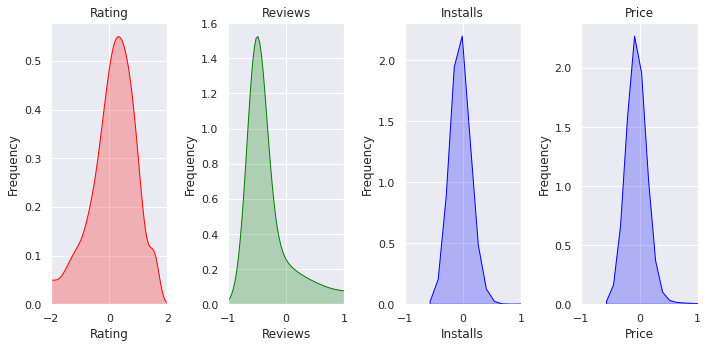

In [246]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots(1, 4)

sns.kdeplot(df.Rating, color="Red", shade=True, ax=ax[0])
ax[0].set_xlim(-2,2)
ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Frequency")
ax[0].set_title('Rating')

sns.kdeplot(df.Reviews, color="Green", shade=True, ax=ax[1])
ax[1].set_xlim(-1,1)
ax[1].set_xlabel("Reviews")
ax[1].set_ylabel("Frequency")
ax[1].set_title('Reviews')

sns.kdeplot(df.Installs, color="Blue", shade=True, ax=ax[2])
ax[2].set_xlim(-1,1)
ax[2].set_xlabel("Installs")
ax[2].set_ylabel("Frequency")
ax[2].set_title('Installs')

sns.kdeplot(df.Price, color="Blue", shade=True, ax=ax[3])
ax[3].set_xlim(-1,1)
ax[3].set_xlabel("Price")
ax[3].set_ylabel("Frequency")
ax[3].set_title('Price')

plt.tight_layout()

# Feature Selection

Many models, especially those based on regression slopes and intercepts, will estimate parameters for every term in the model. 
Because of this, the presence of non-informative variables can add uncertainty to the predictions and reduce the overall effectiveness of the model.



---


### **Univariate Selection**

SelectKBest class for use with some statistical tests to select a specified number of features
The example below uses the chi-squared statistical test to select 5 of the best features from the example dataset

In [247]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#We will use the data that already encorded with one-hot encorder to use categoritcal columns
#App name can't effect to other values, So we don't use 'App' in this step
df_featureselection= df2.iloc[:, 1:]
df_featureselection = df_featureselection.apply(pd.to_numeric, errors='coerce')

#관심있다 1, 관심 없다 0 , Install>5000 (=Q3)이상인가를 기준으로->outcomeColumn 추가
#관심도-Installs로 변경.
#현재 가장 이슈가 되고 있는 앱을 기준으로 사용을 권해보는 코드
df_featureselection['outcome'] = df_featureselection['Installs'].apply(lambda x: 1 if x >5000  else 0)
df_featureselection

,Rating,Reviews,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,outcome
0,4.1,159.0,1000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.9,967.0,500000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.7,87510.0,50000000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.3,967.0,100000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,4.4,167.0,5000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,44.0,10000000,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10834,4.0,7.0,500000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10836,4.5,38.0,50000000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10837,5.0,4.0,100000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [248]:
X=df_featureselection.drop(columns ="outcome") #independent columns
y=df_featureselection["outcome"] # target column ->Rating
y

0        1
1        1
2        1
4        1
5        1
        ..
10833    1
10834    1
10836    1
10837    1
10839    1
Name: outcome, Length: 7726, dtype: int64

In [249]:
X

,Rating,Reviews,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159.0,1000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,500000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,50000000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,100000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167.0,5000000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,44.0,10000000,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10834,4.0,7.0,500000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,38.0,50000000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,4.0,100000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit =bestfeatures.fit(X,y)
dfcolumns =pd.DataFrame(X.columns)
dfscores=pd.DataFrame(fit.scores_)

#Concatenate two dataframes for better visualization

featureScores=pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['Specs', 'Scores'] #name the dataframe columns

print(featureScores.nlargest(5, 'Scores'))

               Specs        Scores
2           Installs  3.168343e+16
1            Reviews  3.015598e+06
3               Type  4.588308e+01
5     Content Rating  1.217247e+01
26  Category_MEDICAL  9.963726e+00


In [251]:
#다른 모형을 사용해서 중요도 계산하기
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

[2.52413819e-01 1.92580771e-01 4.35132610e-01 1.22343942e-02
 3.57549336e-02 1.56553350e-02 6.16053379e-04 2.87782753e-04
 1.29280342e-04 1.28980471e-03 2.86753411e-03 5.07101530e-04
 3.22110779e-03 1.25915005e-03 3.61019180e-04 7.95811049e-05
 6.86491529e-04 4.31649731e-03 1.38663924e-03 8.59397320e-04
 5.28404054e-03 1.18988884e-03 6.10157401e-05 4.84758221e-04
 3.33297437e-03 7.66790953e-04 4.06161122e-03 2.21629921e-03
 2.69662578e-03 1.58995742e-03 3.61220943e-03 1.85508559e-03
 1.82780573e-03 1.29696113e-03 4.06820088e-03 2.86763691e-03
 7.99363193e-04 2.52026760e-04 9.74446054e-05]


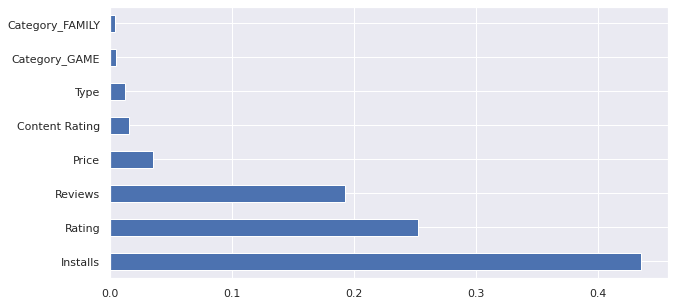

In [252]:
model =ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use buit-in class features-importances of tree-based classifiers

#plot graph of feature importances for better visualization

feat_importances= pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

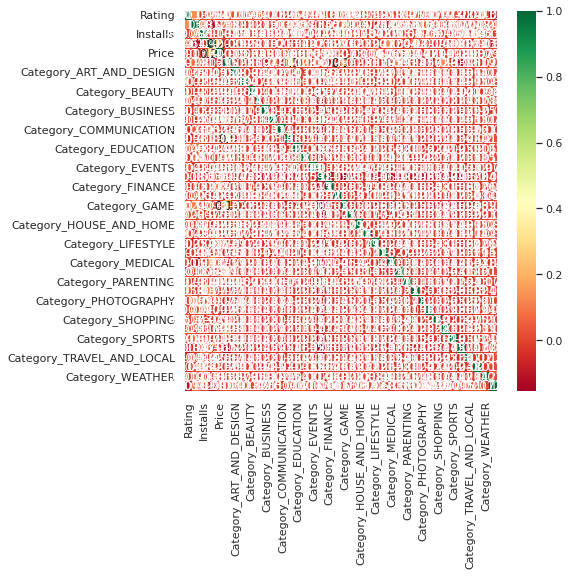

In [253]:
#Correaltion matirx

corrmat = df_featureselection.corr() #corr() computes pairwise correlations of features in a Data Frame
top_corr_features =corrmat.index
plt.figure(figsize=(7,7))

#plot the heat map
g=sns.heatmap(df_featureselection[top_corr_features].corr(),annot=True, cmap="RdYlGn")

# Anlaysis Algorithms

 ## Logistic Regression

From the feature selection, select the five columns('Type', 'Rating', 'Reviews', 'Content Rating', 'Price')
 that have the most influence with outcome and use them for algorithm.
 

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [255]:
df1 = df_featureselection[['Type','Rating', 'Reviews','Content Rating','Price']]

In [256]:
df1

,Type,Rating,Reviews,Content Rating,Price
0,0,4.1,159.0,0,0.0
1,0,3.9,967.0,0,0.0
2,0,4.7,87510.0,0,0.0
4,0,4.3,967.0,0,0.0
5,0,4.4,167.0,0,0.0
...,...,...,...,...,...
10833,0,4.8,44.0,0,0.0
10834,0,4.0,7.0,0,0.0
10836,0,4.5,38.0,0,0.0
10837,0,5.0,4.0,0,0.0


In [257]:
X=df1
y=df_featureselection['outcome'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, 
                                               random_state=1, 
                                              stratify=y)

In [258]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)

In [259]:
import sys
np.set_printoptions(threshold=sys.maxsize)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [260]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9831824062095731


## classification

### k-nearest neighbors

In [261]:
from sklearn.neighbors import KNeighborsClassifier
X= df1
y=df_featureselection['outcome'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, 
                                               random_state=1, 
                                              stratify=y)

In [262]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
knn.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [263]:
knn.score(X_test,y_test)

0.9831824062095731

#Evaluation
->with KFold methods.

We determine how well the model is predicting based on the presence or absence of the previously predicted 'high-interest app'

In [264]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=3)

# train model with cv of 5
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

# print each cv score (accuracy) and average them  print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores mean:0.9783841377895561


In [265]:
#this if for Logistics Alogorithms
from sklearn.model_selection import cross_val_score

logistic_cv = LogisticRegression()

# train model with cv of 5
cv_scores = cross_val_score(logistic_cv, X, y, cv=5)

# print each cv score (accuracy) and average them  print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores mean:0.9818789484921941
